In [915]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [916]:
# Load the data
df = pd.read_csv('LoanApprovalPrediction.csv')
df.head()
df.info()
# get unique values of each column
for col in df.columns:
    if df[col].dtype == 'object':
        # ignore loan_id column
        if col != 'Loan_ID':
            print(col, df[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB
Gender ['Male' 'Female']
Married ['No' 'Yes']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
P

In [917]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [918]:
# Droping the Loan_ID column
df.drop('Loan_ID', axis=1, inplace=True)

"""
    Label_encoder object knows how to understand word labels
    - Gender: 1-Male, 0-Female
    - Married: 1-Yes, 0-No
    - Dependents: 3+ is 3
    - Education: 1-Graduate, 0-Not Graduate
    - Self_Employed: 1-Yes, 0-No
    - Property_Area: 2-Urban, 1-Semiurban, 0-Rural
    - Loan_Status: 1-Y, 0-N
"""
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col] = label_encoder.fit_transform(df[col])
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 56.2 KB


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,598.000000,598.000000,586.000000,598.000000,598.000000,598.000000,598.000000,577.000000,584.000000,549.000000,598.000000,598.000000
mean,0.814381,0.648829,0.755973,0.222408,0.183946,5292.252508,1631.499866,144.968804,341.917808,0.843352,1.038462,0.687291
std,0.389124,0.477736,1.007751,0.416212,0.387765,5807.265364,2953.315785,82.704182,65.205994,0.363800,0.789499,0.463985
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.750000,0.000000,0.000000,5746.000000,2324.000000,167.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000,2.000000,1.000000


In [919]:
df.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [920]:
# Fill missing values with mean column values
df.fillna(df.mean(), inplace=True)
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [921]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


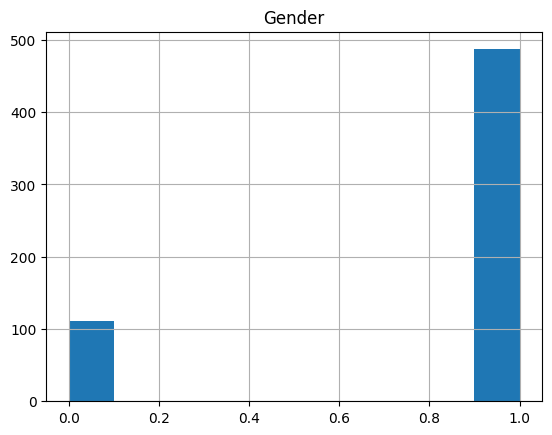

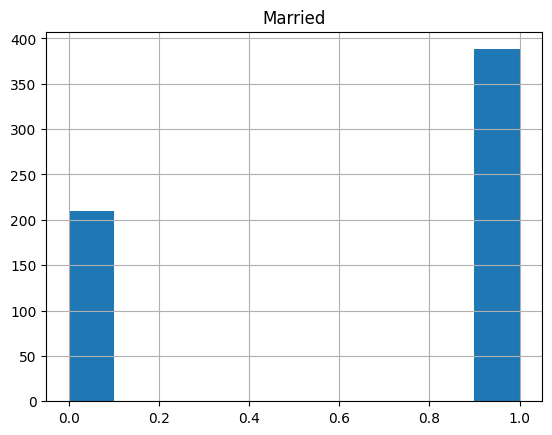

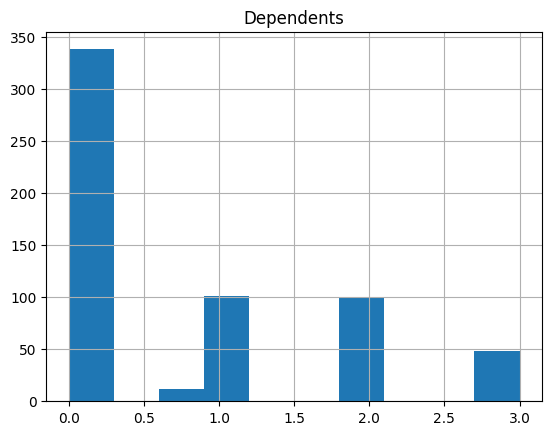

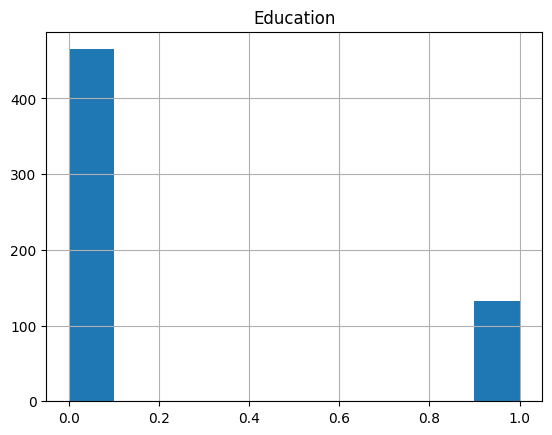

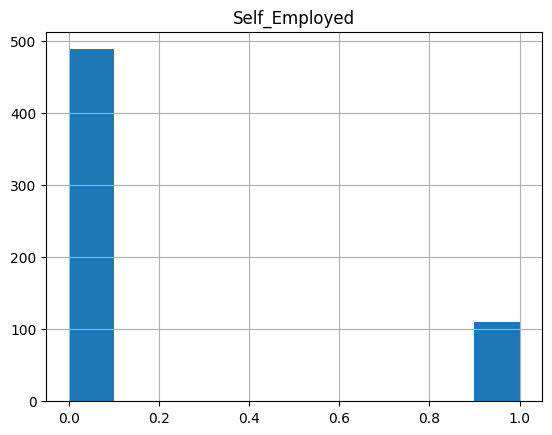

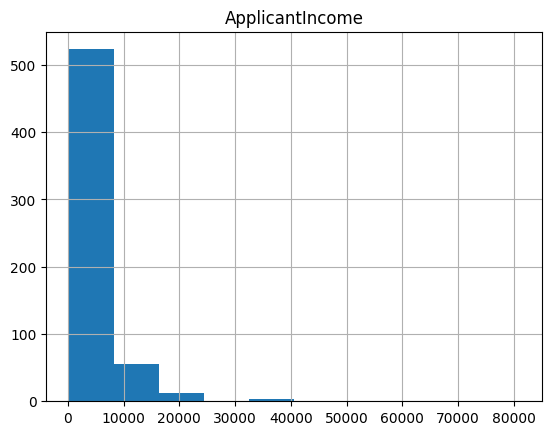

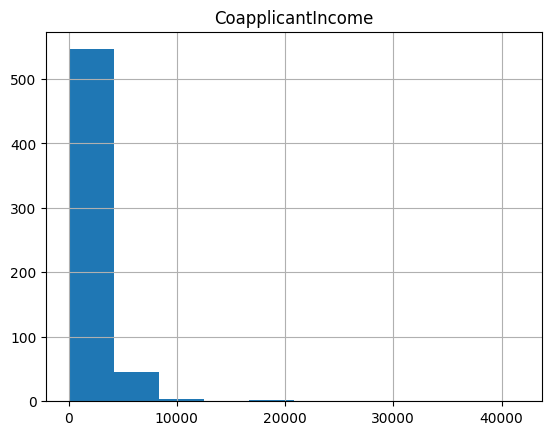

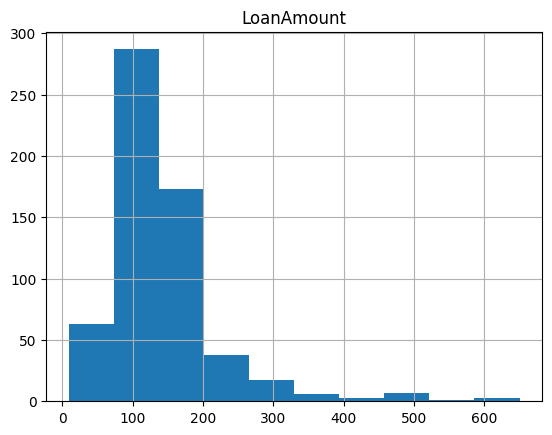

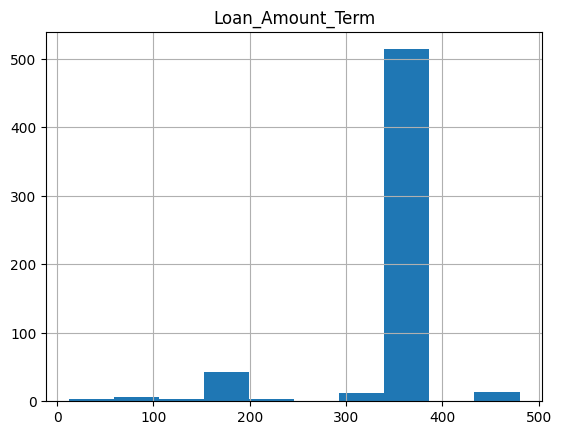

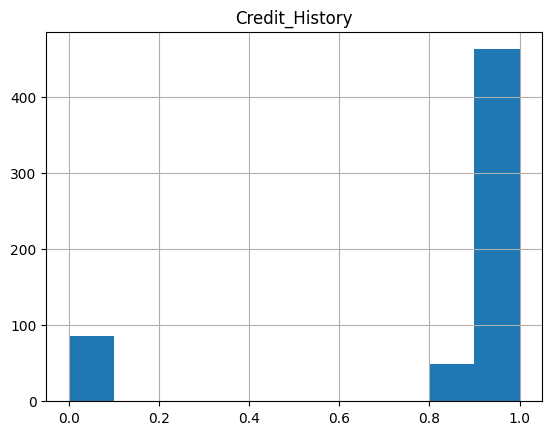

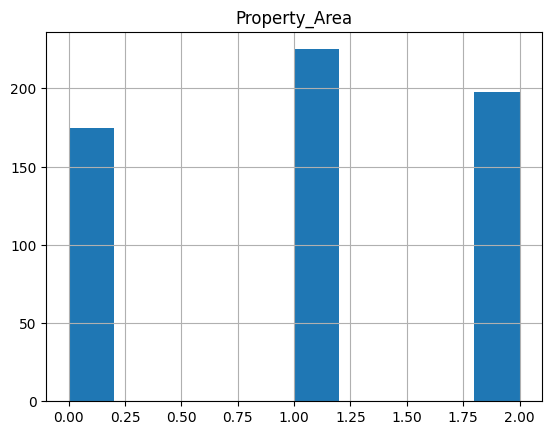

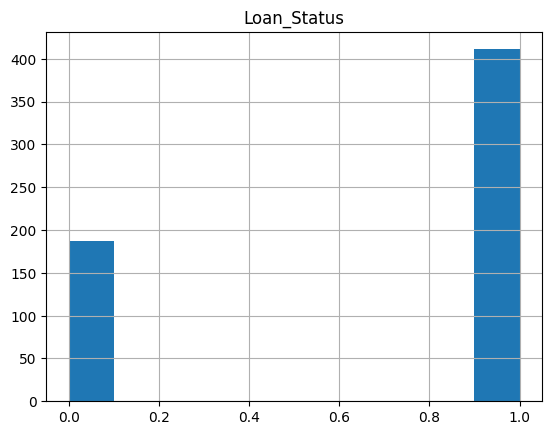

In [922]:
# Plotting the occurrence of data in each category
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].value_counts().plot(kind='bar', title=col)
        plt.show()
    else:
        df[col].hist()
        plt.title(col)
        plt.show()

<Axes: >

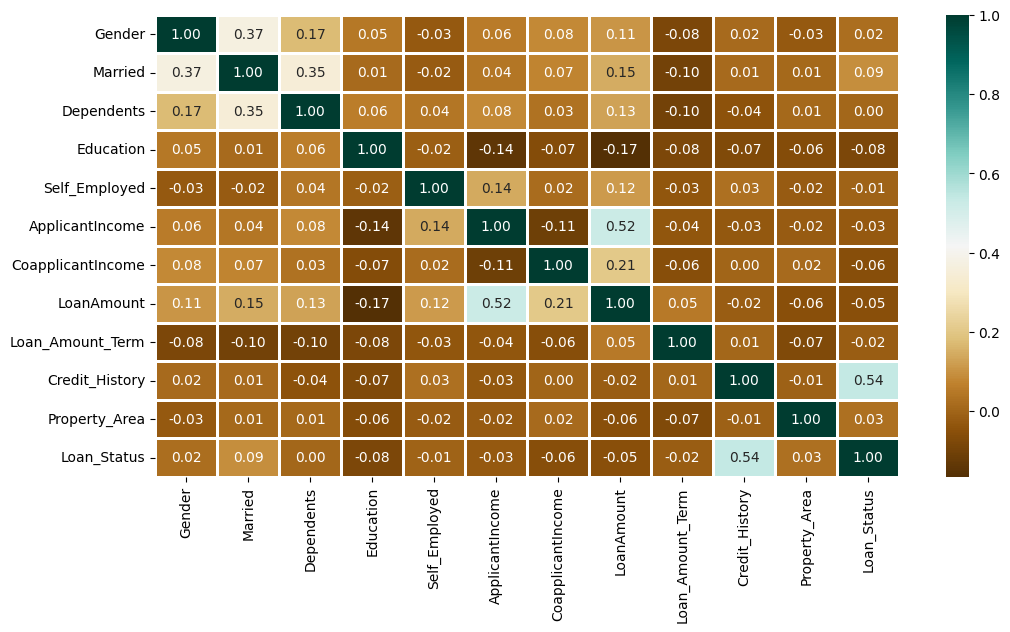

In [923]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr("pearson"),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

- Strong correlation between 
    - Credit_History & Loan Status
    - ApplicationIncome & LoanAmount
- Medium correlation between
    - CoapplicantIncome & LoanAmount
- We will build models base on the positive relationship between the features and the output

In [924]:
# build a logistic regression model
# Split the data into training and test sets
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the test set results 
y_pred = logreg.predict(X_test)

# Get the score of the model for the test set and training set
print("Test set: ", logreg.score(X_test, y_test))
print("Training set: ", logreg.score(X_train, y_train))

# see output with sklearn.metrics.classification_report
print(metrics.classification_report(y_test, y_pred))

# see output with sklearn.metrics.confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred))

Test set:  0.8
Training set:  0.8014354066985646
              precision    recall  f1-score   support

           0       0.75      0.46      0.57        52
           1       0.81      0.94      0.87       128

    accuracy                           0.80       180
   macro avg       0.78      0.70      0.72       180
weighted avg       0.79      0.80      0.78       180

[[ 24  28]
 [  8 120]]


/home/vivarium/Coding/USTH/Machine-Learning-Data-Mining-I/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [925]:
# build a logistic regression model with regularization
logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)

# Predict the test set results
y_pred = logreg.predict(X_test)

# Get the score of the model for the test set and training set
print("Test set: ", logreg.score(X_test, y_test))
print("Training set: ", logreg.score(X_train, y_train))

# see output with sklearn.metrics.classification_report
print(metrics.classification_report(y_test, y_pred))

# see output with sklearn.metrics.confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred)) # layout [[TN, FP], [FN, TP]]


Test set:  0.8222222222222222
Training set:  0.7990430622009569
              precision    recall  f1-score   support

           0       0.88      0.44      0.59        52
           1       0.81      0.98      0.89       128

    accuracy                           0.82       180
   macro avg       0.85      0.71      0.74       180
weighted avg       0.83      0.82      0.80       180

[[ 23  29]
 [  3 125]]


In [926]:
# Normalize the data
X = preprocessing.StandardScaler().fit(X).transform(X)

# Compare the accuracy of the model with and without normalization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)

# Predict the test set results
y_pred = logreg.predict(X_test)

# Get the score of the model for the test set and training set
print("Test set: ", logreg.score(X_test, y_test))
print("Training set: ", logreg.score(X_train, y_train))

# see output with sklearn.metrics.classification_report
print(metrics.classification_report(y_test, y_pred))

# see output with sklearn.metrics.confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred))

Test set:  0.8277777777777777
Training set:  0.7990430622009569
              precision    recall  f1-score   support

           0       0.92      0.44      0.60        52
           1       0.81      0.98      0.89       128

    accuracy                           0.83       180
   macro avg       0.87      0.71      0.74       180
weighted avg       0.84      0.83      0.81       180

[[ 23  29]
 [  2 126]]


In [927]:
# Split the data into training, validation and test sets
X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 70% training and 30% test
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42) # 80% validation and 20% test

# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10, 100]

# Build a logistic regression model with regularization
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train, y_train)

# tuning hyperparameters with validation set 
for c in C:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    print("C: ", c)
    print("Validation set: ", logreg.score(X_val, y_val))
    print("Training set: ", logreg.score(X_train, y_train))

print()

# Predict the test set results
y_pred = logreg.predict(X_test)

# Get the score of the model for the test set and training set
print("Test set: ", logreg.score(X_test, y_test))

# see output with sklearn.metrics.classification_report
print(metrics.classification_report(y_test, y_pred))

# see output with sklearn.metrics.confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred))

# test data
testing = np.array([1, 1, 0, 0, 0, 1000000, 10000000, 1000000, 1, 1, 10]).reshape(1, -1)

# Predict the test set results
y_pred = logreg.predict(testing)
print(y_pred)

C:  0.001
Validation set:  0.6904761904761905
Training set:  0.6799163179916318
C:  0.01
Validation set:  0.7976190476190477
Training set:  0.803347280334728
C:  0.1
Validation set:  0.7976190476190477
Training set:  0.805439330543933
C:  1
Validation set:  0.7976190476190477
Training set:  0.805439330543933
C:  10
Validation set:  0.7976190476190477
Training set:  0.805439330543933
C:  100
Validation set:  0.7976190476190477
Training set:  0.805439330543933

Test set:  0.8888888888888888
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.90      0.96      0.93        28

    accuracy                           0.89        36
   macro avg       0.87      0.79      0.82        36
weighted avg       0.89      0.89      0.88        36

[[ 5  3]
 [ 1 27]]
[0]


In [928]:
# Sigmod function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [929]:
# function to calculate the cost (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    y_pred = sigmoid(X.dot(theta))
    cost = np.sum(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)) / m
    return cost

In [930]:
# function to calculate the F1 score
def compute_f1_score(X, y, theta):
    y_pred = sigmoid(X.dot(theta))
    y_pred = np.where(y_pred >= 0.5, 1, 0)
    tp = np.sum((y == 1) & (y_pred == 1))
    tn = np.sum((y == 0) & (y_pred == 0))
    fp = np.sum((y == 0) & (y_pred == 1))
    fn = np.sum((y == 1) & (y_pred == 0))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    return f1_score, accuracy

In [931]:
# predict function
def predict(X, theta):
    y_pred = sigmoid(X.dot(theta))
    y_pred = np.where(y_pred >= 0.5, 1, 0)
    return y_pred

In [932]:
# Cost history
cost_history = []

In [933]:
# perform gradient descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    for iteration in range(num_iterations):
        error = sigmoid(X.dot(theta)) - y
        gradient = X.T.dot(error) / len(X)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        f1_score = compute_f1_score(X, y, theta)
        # print("Iteration:", iteration, "Cost:", cost, "F1 score:", f1_score)
        # print("Coefficients:", theta)
    return theta, cost_history, f1_score

In [934]:
# perform gradient descent with regularization (L2)
def gradient_descent_regularization(X, y, theta, alpha, num_iterations, lambd):
    for iteration in range(num_iterations):
        error = sigmoid(X.dot(theta)) - y
        gradient = X.T.dot(error) / len(X)
        theta[0] -= alpha * gradient[0]
        theta[1:] = (1 - alpha * lambd / len(X)) * theta[1:] - alpha * gradient[1:]
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        f1_score = compute_f1_score(X, y, theta)
        # print("Iteration:", iteration, "Cost:", cost, "F1 score:", f1_score)
        # print("Coefficients:", theta)
    return theta, cost_history, f1_score

In [935]:
# plot the cost function as a function of the iteration
def plot_cost_function(cost_history):
    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

In [936]:
# # Use self-implemented logistic regression model to predict the test set results
# # Split the data into training, validation and test sets
# X = df.drop('Loan_Status', axis=1)
# y = df['Loan_Status']

# # hyperparameters
# alpha = 0.1
# num_iterations = 800000
# lambd = 0.1

# # initialize coefficients
# theta = np.zeros(X.shape[1])

# # normalize the data
# X = preprocessing.StandardScaler().fit(X).transform(X)

# # split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 70% training and 30% test
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=0) # 80% validation and 20% test

# # perform gradient descent
# theta, cost_history, f1_score = gradient_descent(X_train, y_train, theta, alpha, num_iterations)

# # plot the cost function as a function of the iteration
# plot_cost_function(cost_history)

# # predict the test set results
# y_pred = predict(X_test, theta)

# # get the score of the model for the test set and training set
# print("Test set: ", f1_score[1])
# print("Training set: ", compute_f1_score(X_train, y_train, theta)[1])


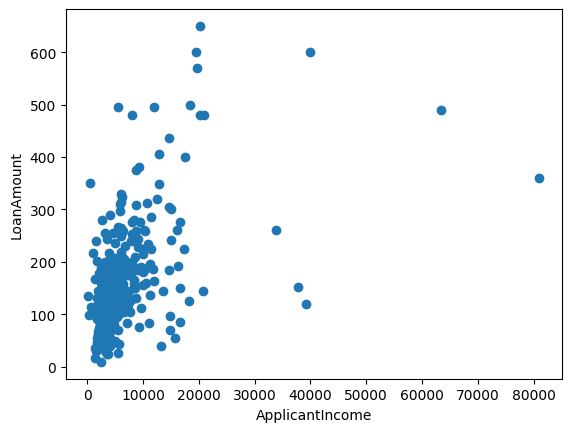

In [937]:
# Scatter plot to see the relationship between the ApplicantIncome and LoanAmount see if there is a linear relationship
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

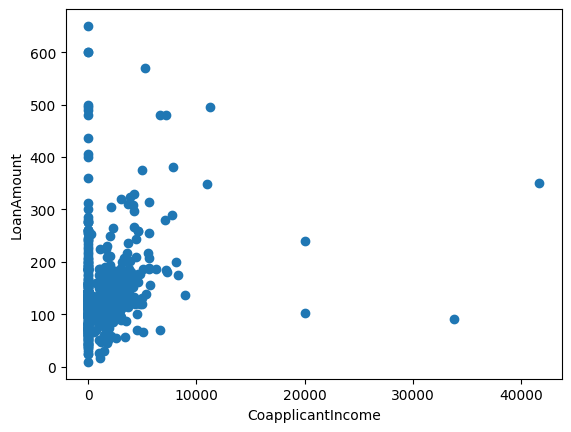

In [938]:
# Scatter plot to see the relationship between the CoApplicantIncome and LoanAmount see if there is a linear relationship
plt.scatter(df['CoapplicantIncome'], df['LoanAmount'])
plt.xlabel('CoapplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

Test set:  0.40221666375964227
Training set:  0.32376243051542253
Coefficients:  [41.28276153 20.66877781]
Intercept:  144.1095149107869
Mean squared error: 3266.94


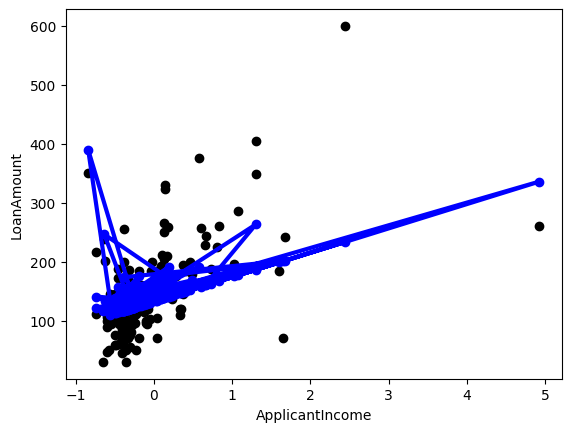

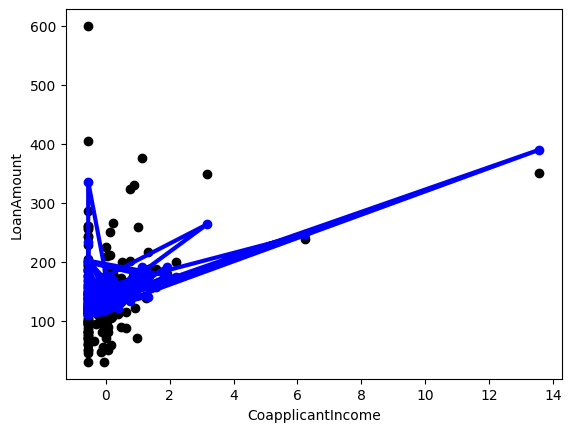

In [939]:
# Linear regression model to predict the LoanAmount based on the ApplicantIncome and CoApplicantIncome
X = df[['ApplicantIncome', 'CoapplicantIncome']]
y = df['LoanAmount']

# normalize the data
X = preprocessing.StandardScaler().fit(X).transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Get the score of the model for the test set and training set
print("Test set: ", model.score(X_test, y_test))
print("Training set: ", model.score(X_train, y_train))

# See the coefficients, intercept, mean squared error
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Plot the regression line through the data
plt.scatter(X_test[:,0], y_test, color='black')
plt.scatter(X_test[:,0], y_pred, color='blue')
plt.plot(X_test[:,0], y_pred, color='blue', linewidth=3)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

# Plot the regression line through the data
plt.scatter(X_test[:,1], y_test, color='black')
plt.scatter(X_test[:,1], y_pred, color='blue')
plt.plot(X_test[:,1], y_pred, color='blue', linewidth=3)
plt.xlabel('CoapplicantIncome')
plt.ylabel('LoanAmount')
plt.show()
